In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, BatchNormalization 


In [2]:
fashin_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashin_mnist.load_data()

In [4]:
class_names = [ "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "bag", "Ankle boot" ]

In [5]:
train_images = train_images.reshape( ( 60000, 28,28,1 ) )

In [6]:
train_images = train_images.astype( 'float32' ) / 255

In [7]:
test_images = test_images.reshape( ( 10000, 28,28,1 ) )

In [8]:
test_images = test_images.astype( 'float32' ) / 255

In [9]:
model = Sequential()

In [10]:
model.add( Conv2D( 32, (5,5), activation='relu', input_shape=(28,28,1) ) )
model.add( MaxPooling2D( (2,2) ))
model.add( Conv2D( 64, (5,5), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ))

C:\Users\jesus\anaconda3\envs\curso_IA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add( Flatten() )

In [12]:
model.add( Dense( 10, activation='softmax' ) )

In [13]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [14]:
model.fit( train_images, train_labels, epochs=5 )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6255 - loss: 1.1417
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8129 - loss: 0.5232
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8399 - loss: 0.4540
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8513 - loss: 0.4204
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8619 - loss: 0.3932


In [15]:
test_loss, test_acc = model.evaluate( test_images, test_labels  )
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8568 - loss: 0.4056  


0.8511000275611877

In [16]:
model = Sequential()

In [17]:
model.add( Conv2D( 64, (7,7), activation='relu', padding='same', input_shape=(28,28,1) ) )
model.add( MaxPooling2D( (2,2) ))

model.add( Conv2D( 128, (3,3), activation='relu', padding='same' ) )
model.add( MaxPooling2D( (2,2) ))

model.add( Flatten() )


In [18]:
model.add( Dense( 64, activation='relu' ) )

model.add( Dense( 10, activation='softmax' ) )

In [19]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [20]:
model.fit( train_images, train_labels, epochs=5 )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6268 - loss: 1.0919 
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8067 - loss: 0.5356
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8404 - loss: 0.4429
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8587 - loss: 0.3980 
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8708 - loss: 0.3709


In [21]:
test_loss, test_acc = model.evaluate( test_images, test_labels  )
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8655 - loss: 0.3802  


0.8619999885559082

In [22]:
def plot_image( i, predictions_array, true_label, img ):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax( predictions_array )

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel( "{} {:2.0f}% ({})".format( class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label] ), color=color )

In [23]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar( range(10), predictions_array, color='#007700' )
    plt.ylim( [0,1] )
    predicted_label = np.argmax( predictions_array )

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('black');

In [24]:
def show_image_predicted(i):
    plt.figure( figsize=(6,3) )
    plt.subplot( 1,2,1 )
    plot_image( i, predictions[i], test_labels, test_images  )
    plt.subplot(1,2,2)
    plot_value_array( i, predictions[i], test_labels )

In [25]:
predictions = model.predict( test_images )

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


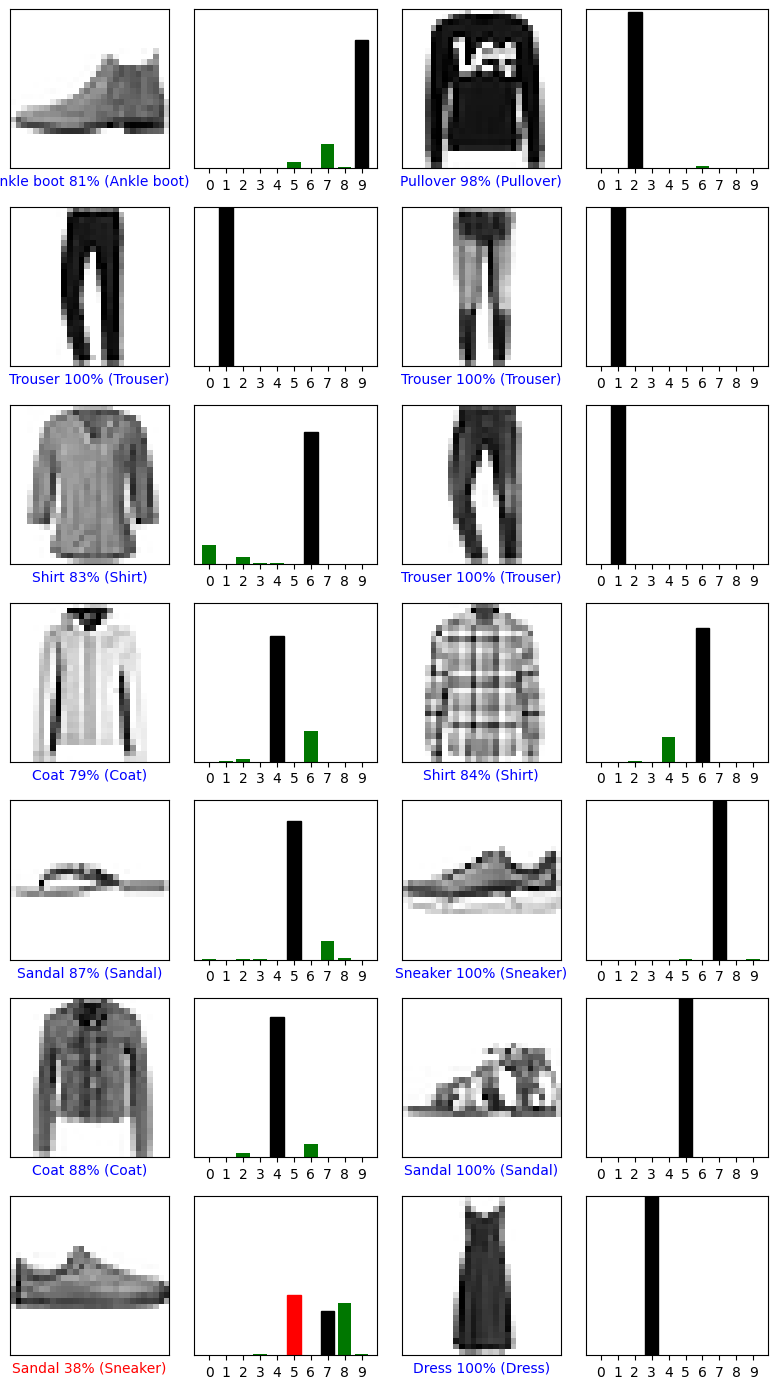

In [26]:
num_rows= 7
num_cols = 2
num_images = num_rows * num_cols
plt.figure( figsize=( 2*2*num_cols, 2* num_rows) )

for i in range(num_images):
    plt.subplot( num_rows, 2*num_cols, 2*i+1 )
    plot_image( i, predictions[i], test_labels, test_images  )
    plt.subplot( num_rows, 2*num_cols, 2*i+2 )
    plot_value_array( i, predictions[i], test_labels )
plt.tight_layout();

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [28]:
model.fit( train_images, train_labels, epochs=5 )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8549 - loss: 0.4027
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9014 - loss: 0.2651
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9185 - loss: 0.2205
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9274 - loss: 0.1917
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9377 - loss: 0.1665


In [29]:
test_loss, test_acc = model.evaluate( test_images, test_labels  )
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9114 - loss: 0.2564  


0.9129999876022339

In [30]:
predictions = model.predict( test_images )

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


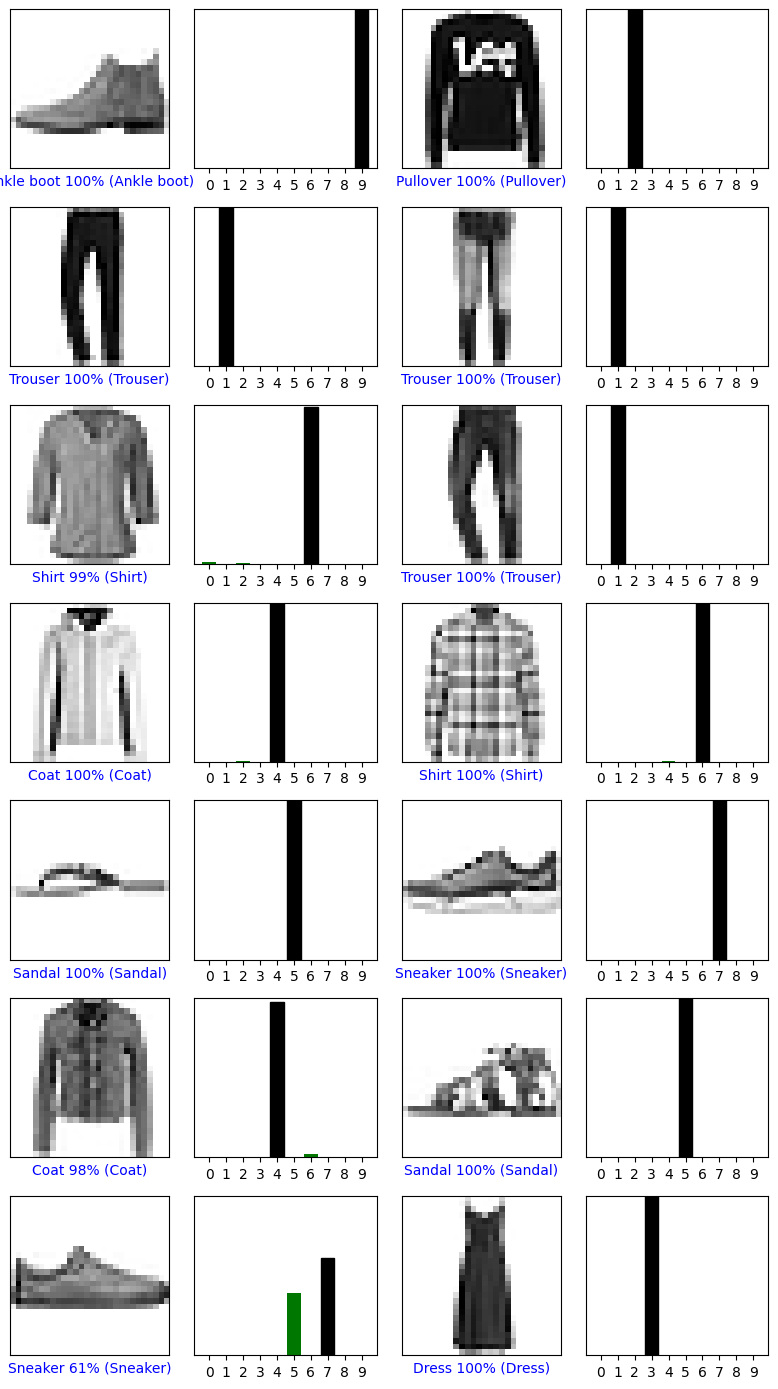

In [31]:
num_rows= 7
num_cols = 2
num_images = num_rows * num_cols
plt.figure( figsize=( 2*2*num_cols, 2* num_rows) )

for i in range(num_images):
    plt.subplot( num_rows, 2*num_cols, 2*i+1 )
    plot_image( i, predictions[i], test_labels, test_images  )
    plt.subplot( num_rows, 2*num_cols, 2*i+2 )
    plot_value_array( i, predictions[i], test_labels )
plt.tight_layout();

In [32]:
from tensorflow.keras.layers import Dropout, BatchNormalization 

In [33]:
def make_model():
    model = Sequential()
    
    model.add( Conv2D(  filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same', input_shape=(28,28,1)  ) )
    model.add( BatchNormalization() )

    model.add( Conv2D(  filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same' ) )
    model.add( BatchNormalization() )
    model.add( Dropout(0.25) )

    model.add( Conv2D(  filters=64, kernel_size=(3,3), activation='relu', strides=1, padding='same' ) )
    model.add( MaxPooling2D( pool_size=(2,2) ))
    model.add( Dropout(0.25) )

    model.add( Conv2D(  filters=128, kernel_size=(3,3), activation='relu', strides=1, padding='same' ) )
    model.add( BatchNormalization() )
    model.add( Dropout(0.25) )

    model.add( Flatten() )

    model.add( Dense( 512, activation='relu' ) )
    model.add( BatchNormalization() )
    model.add( Dropout(0.5) )

    model.add( Dense( 128, activation='relu' ) )
    model.add( BatchNormalization() )
    model.add( Dropout(0.5) )
    
    model.add( Dense( 10, activation='softmax' ) )

    return model

In [34]:
model = make_model()

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [36]:
model.fit( train_images, train_labels, epochs=5 )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 207s 109ms/step - accuracy: 0.7691 - loss: 0.7013
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 205s 109ms/step - accuracy: 0.8804 - loss: 0.3399
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 214s 114ms/step - accuracy: 0.8994 - loss: 0.2843
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 216s 115ms/step - accuracy: 0.9115 - loss: 0.2518
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 215s 115ms/step - accuracy: 0.9186 - loss: 0.2325


In [37]:
test_loss, test_acc = model.evaluate( test_images, test_labels  )
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8869 - loss: 0.3121


0.8866999745368958

In [38]:
model = make_model()

In [41]:
optimazer = tf.keras.optimizers.Adam( learning_rate=0.001 )

In [42]:
model.compile(optimizer=optimazer, loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [44]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler( lambda x: 1e-3 * 0.9**x )

In [ ]:
model.fit( train_images, train_labels, epochs=30, callbacks=[reduce_lr] )

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 213s 112ms/step - accuracy: 0.7655 - loss: 0.6956 - learning_rate: 0.0010
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 211s 112ms/step - accuracy: 0.8849 - loss: 0.3242 - learning_rate: 9.0000e-04
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 210s 112ms/step - accuracy: 0.9045 - loss: 0.2714 - learning_rate: 8.1000e-04
Epoch 4/30
1751/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - accuracy: 0.9163 - loss: 0.2368 

In [ ]:
-